# CAPSTONE PROJECT 1
**CREDIT CARD FRAUD DETECTION** :
Without Imbalancing the Data

**IMPORTING THE LIBRARIES**

In [2]:
# Data Collection, Loading & Visualization Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning Model Building, Hyper Tunning & Evalution Matrix Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

**LOADING THE DATASET**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/creditcard.csv')
df=data.copy()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Here we can unerstand that we have 31 columns and 284807 rows

**Information about the Data**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**EXPLORATORY DATA ANALYSIS**

In [4]:
#Displaying the concise information about the DataFrame, checking the null values and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

here we understand that each column consist float datatype except the y variable which is int

In [ ]:
# there are no missing values in the dataset

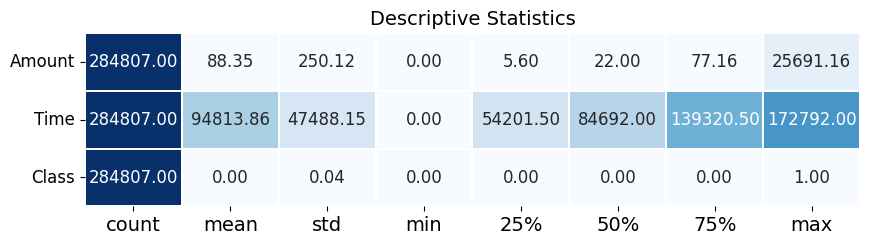

In [6]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = 'Blues',
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

Getting the Count: The number of non-null values in each column.

Mean: The average value of each column.

Standard Deviation (std): It indicates how much individual data points deviate from the mean.

Minimum (min): The smallest value in each column.

25th Percentile (25%): Also known as the first quartile, it's the value below which 25% of the data falls.

Median (50%): Also known as the second quartile or the median, it's the middle value when the data is sorted. It represents the central tendency.

75th Percentile (75%): Also known as the third quartile, it's the value below which 75% of the data falls.

Maximum (max): The largest value in each column

DATA VISUALIZATION

In [8]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [9]:
#checking for imbalance data
count=pd.value_counts(df['Class'],sort=True)
count

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

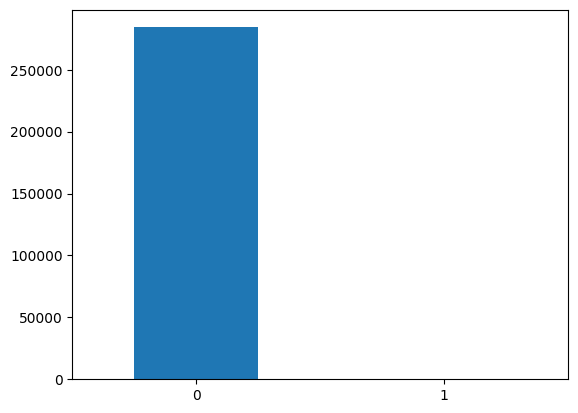

In [10]:
count.plot(kind='bar',rot=0)

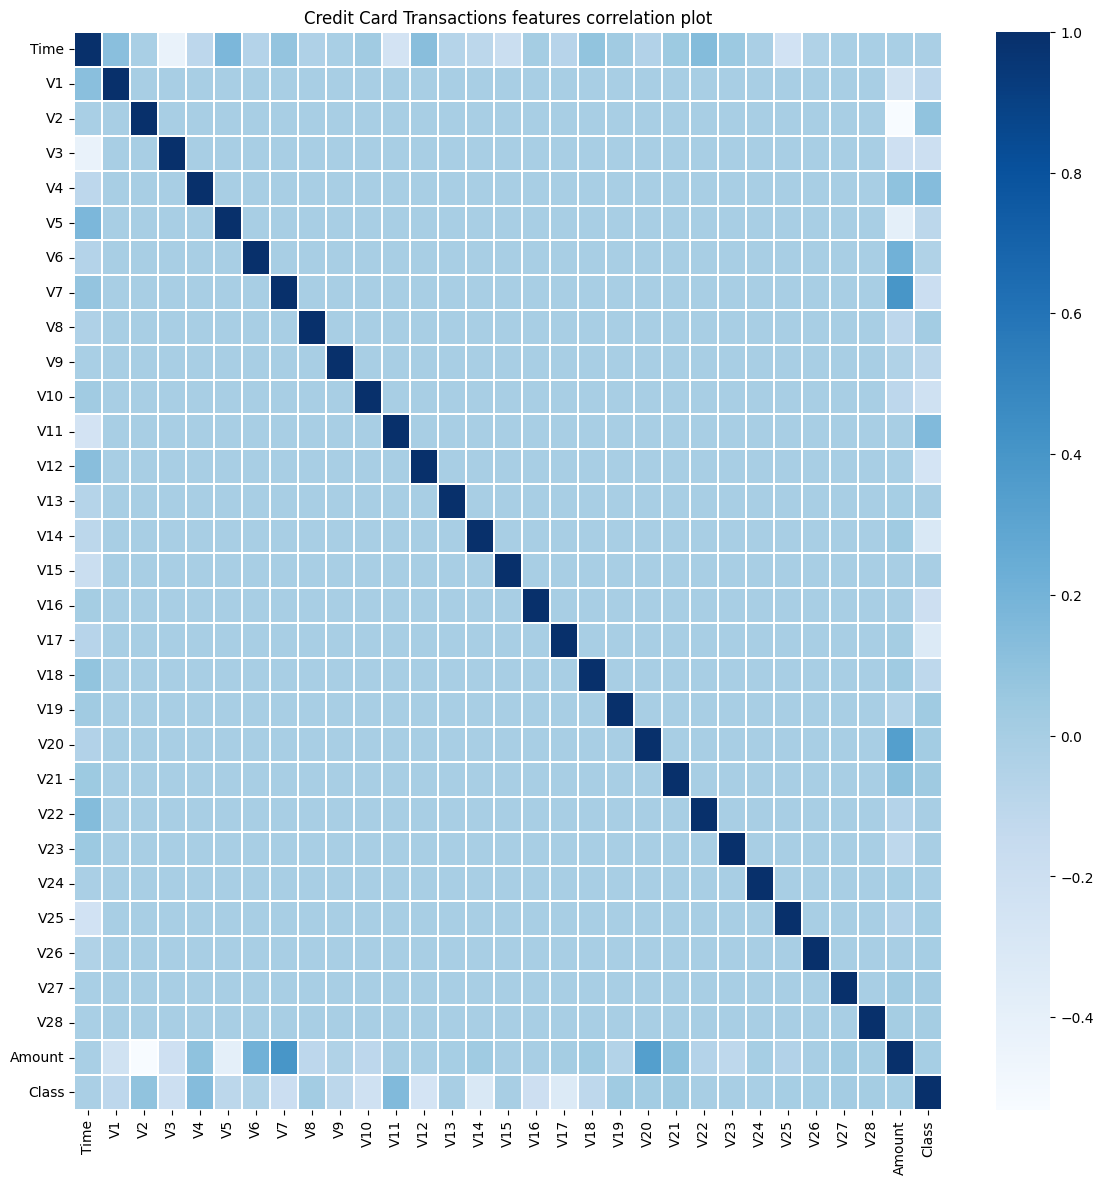

In [11]:
# correlation heatmap:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

DATA PREPROCESSING

In [12]:
# Distribution of Fraud and Normal Transactions

px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)")

In [13]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

In [14]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

Model Building

In [15]:
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7,stratify=y)
X.shape

(284807, 31)

In [16]:
count=pd.value_counts(df['Class'],sort=True)
count

0    284315
1       492
Name: Class, dtype: int64

In [17]:
# standardization of data
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print(" KNN Model Test Accuracy Score is: ", accuracy_score(y_test, y_predknn))
print("Model Test F1 Score is: ", f1_score(y_test, y_predknn))
print("Classification_report: \n",classification_report(y_test, y_predknn))

 KNN Model Test Accuracy Score is:  0.9994733330992591
Model Test F1 Score is:  0.8339483394833949
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.76      0.83       148

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predrfc = rfc.predict(X_test)
print("Random Forest Classifier Model Test Accuracy Score is: ", accuracy_score(y_test, y_predrfc))
print("Model Test F1 Score is: ", f1_score(y_test, y_predrfc))
print("Classification_report: \n",classification_report(y_test, y_predrfc))

Random Forest Classifier Model Test Accuracy Score is:  0.9994967405170698
Model Test F1 Score is:  0.8377358490566037
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_predxgb = xgb.predict(X_test)
print("XGBClassifier Model Test Accuracy Score is: ", accuracy_score(y_test, y_predxgb))
print("Model Test F1 Score is: ", f1_score(y_test, y_predxgb))
print("Classification_report: \n",classification_report(y_test, y_predxgb))

XGBClassifier Model Test Accuracy Score is:  0.9994733330992591
Model Test F1 Score is:  0.8314606741573033
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
check = pd.DataFrame({'MODELS':['KNN','RFC','XGB'],
                        'ACCURACY':[accuracy_score(y_test,y_predknn),
                                    accuracy_score(y_test,y_predrfc),
                                    accuracy_score(y_test,y_predxgb)],
                       'F-1 SCORE':[f1_score(y_test, y_predknn),
                                    f1_score(y_test, y_predrfc),
                                    f1_score(y_test, y_predxgb)]})
check

,MODELS,ACCURACY,F-1 SCORE
0,KNN,0.999473,0.833948
1,RFC,0.999497,0.837736
2,XGB,0.999473,0.831461


RandomForestClassifier Model Feature Importance: 



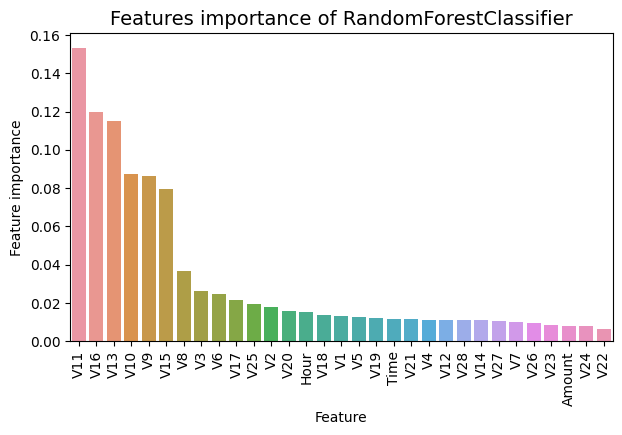

XGBClassifier Model Feature Importance: 



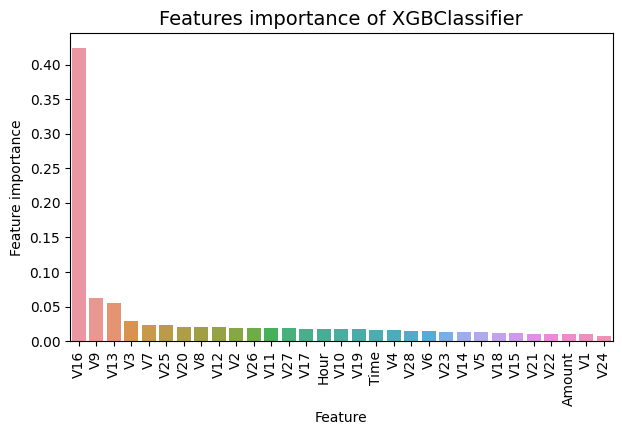

In [25]:
# for all models
models = [rfc, xgb]

target = 'Class'
predictors = ['Time',"Hour", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

for model in models:
    print(type(model).__name__, "Model Feature Importance: \n")
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance of '+type(model).__name__,fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

PCA

Text(0.5, 1.0, 'PCA: 2 Component')

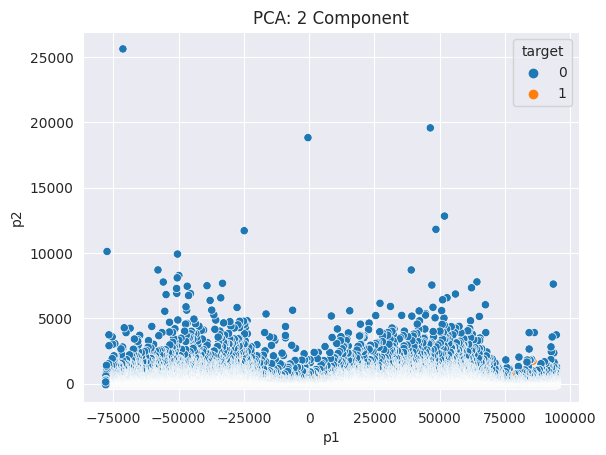

In [26]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

#visualization of reduced data:
sns.set_style("darkgrid")
pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: 2 Component")

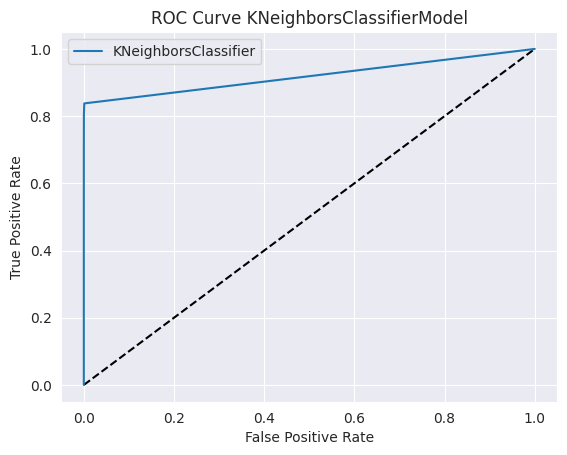

KNeighborsClassifier Model AUC Score is:  0.9187964504747433


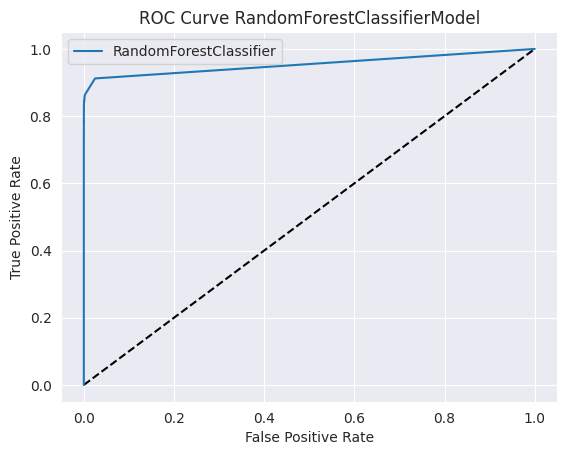

RandomForestClassifier Model AUC Score is:  0.9542749487866437


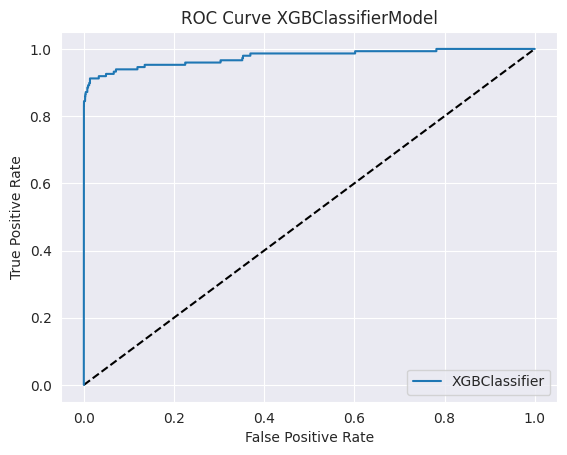

XGBClassifier Model AUC Score is:  0.976086531164496


In [28]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

In [29]:
!pip install scikit-learn
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, auc

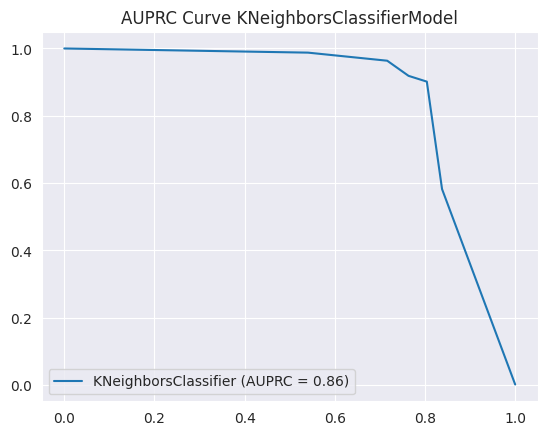

KNeighborsClassifier Model AUPRC Score is:  0.862416604068464


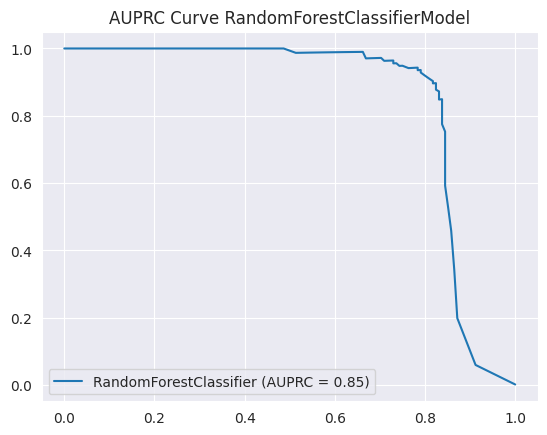

RandomForestClassifier Model AUPRC Score is:  0.8505043702261413


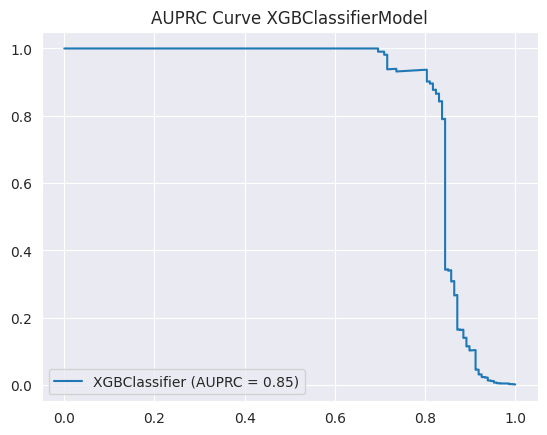

XGBClassifier Model AUPRC Score is:  0.8481609881908813


In [31]:
models = [knn, rfc, xgb]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{type(model).__name__} (AUPRC = {auprc:.2f})')
    plt.title("AUPRC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUPRC Score is: ", auc(recall, precision))

# Conclusion:
After investigating the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated ten predictive models. The data was split in 2 parts, a train set and a test set.

As the Data is imbalance so we cant rely of AUC we have to check the AUPRC and check for the results.

After evaluating the performance of the models using the AUPRC curve and other metrics. The best results were obtained with Random Forest Classifier, with an AUPRC score of 0.8505 and a accuracy of 0.9994.